In [1]:
import pandas as pd 
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sn
import calendar

In [2]:
data = pd.read_csv('C:\\Users\\E\\Documents\\practise_data\\hour.csv', sep=',')

In [3]:
data['date'] = data.dteday.apply(lambda x: x.split()[0])
data['weekday'] = data.date.apply(lambda dateString: dt.datetime.strptime(dateString, '%Y-%m-%d').weekday())

In [4]:
categoryVariableList =['hr', 'weekday', 'mnth', 'season', 'weathersit', 'holiday', 'workingday']
numericalFeatureNames = ['temp', 'atemp', 'hum', 'windspeed']
dropFeatures = ['casual', 'cnt', 'dteday', 'date', 'registered']
for var in categoryVariableList:
    data[var] = data[var].astype('category')

data = data[pd.notnull(data['cnt'])].sort_values(by=['dteday'])
y = data['cnt']

data = data.drop(dropFeatures, axis=1)


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size= 0.3, random_state =42)


In [6]:
from sklearn.ensemble import RandomForestRegressor
rfModel = RandomForestRegressor(n_estimators=500)
rfModel.fit(X=X_train, y=np.log1p(y_train))
pred = rfModel.predict(X=X_test)
print(pred)

c:\users\e\pycharmprojects\venv\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


[3.56887692 3.34256179 3.84457175 ... 5.96260188 5.07126708 5.70626153]


In [7]:
#Feature Analysis
def rmsle(y, y_, convertExp=True):
    if convertExp:
        y=np.exp(y)
        y_=np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v+1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v+1) for v in y_]))
    calc = (log1 - log2) **2
    return np.sqrt(np.mean(calc))

print('RMSLE value for Random Forest is ',rmsle(np.exp(np.log1p(y_test)), np.exp(pred), False ))

RMSLE value for Random Forest is  0.2861566295726924


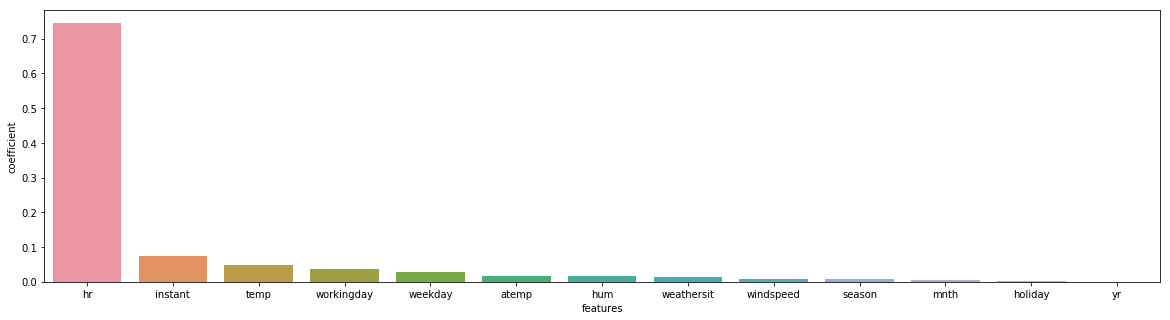

In [9]:
features = pd.DataFrame()
features['features'] = X_train.columns
features['coefficient'] = rfModel.feature_importances_
features.sort_values(by=['coefficient'], ascending= False, inplace=True)
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sn.barplot(data=features, x= 'features', y='coefficient', ax=ax)

In [ ]:
calendar.